In [5]:
from dynamicviz import boot, viz, score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import os
from scipy.stats import spearmanr
from sklearn.datasets import make_s_curve, make_swiss_roll
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

## simulate a swiss roll

In [2]:
def generate_swiss_roll(n_samples, noise=0.0, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    # Generate a uniform distribution of points within the spiral angle range
    t = 3 * np.pi / 2 * (1 + 2 * np.random.rand(n_samples))
    # Generate the corresponding x, y, and z coordinates
    x = t * np.cos(t)
    y = 21 * np.random.rand(n_samples)  # Random heights for each point
    z = t * np.sin(t)
    
    # Add noise if specified
    if noise > 0.0:
        x += noise * np.random.randn(n_samples)
        y += noise * np.random.randn(n_samples)
        z += noise * np.random.randn(n_samples)
    
    # Combine the coordinates into a single array
    S_X = np.vstack((x, y, z)).T
    S_y = t

    return S_X, S_y

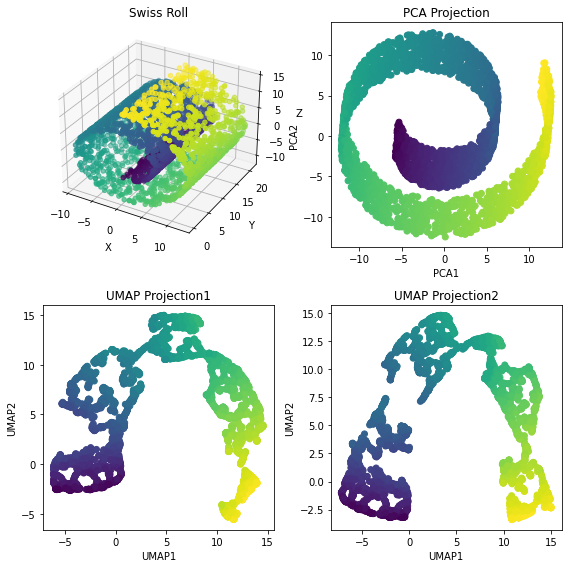

In [8]:
# Generate Swiss roll data
n_samples = 3000
S_X, S_y= generate_swiss_roll(n_samples, noise=0.0, random_state=0)

# Create a 3D plot, PCA, and UMAP
fig = plt.figure(figsize=(8, 8))



#3D plot
ax1 = fig.add_subplot(221, projection='3d')
# Scatter plot for the points with the color mapped to the color variable
ax1.scatter(S_X[:, 0], S_X[:, 1], S_X[:, 2], c=S_y, cmap=plt.cm.viridis)
# Set the title and labels
ax1.set_title('Swiss Roll')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')


# PCA Plot (First Row, Second Column)
pca = PCA(n_components=2)
S_X_pca = pca.fit_transform(S_X)
ax2 = fig.add_subplot(222)
scatter = ax2.scatter(S_X_pca[:, 0], S_X_pca[:, 1], c=S_y, cmap=plt.cm.viridis)
ax2.set_title('PCA Projection')
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')


# Generate UMAP projections
umap = UMAP(n_components=2, random_state=46)
S_X_umap = umap.fit_transform(S_X)
ax2 = fig.add_subplot(223)
scatter = ax2.scatter(S_X_umap[:, 0], S_X_umap[:, 1], c=S_y, cmap=plt.cm.viridis)
ax2.set_title('UMAP Projection1')
ax2.set_xlabel('UMAP1')
ax2.set_ylabel('UMAP2')


# Generate UMAP projections
umap = UMAP(n_components=2, random_state=42)
S_X_umap = umap.fit_transform(S_X)
ax3 = fig.add_subplot(224)
scatter = ax3.scatter(S_X_umap[:, 0], S_X_umap[:, 1], c=S_y, cmap=plt.cm.viridis)
ax3.set_title('UMAP Projection2')
ax3.set_xlabel('UMAP1')
ax3.set_ylabel('UMAP2')

# Show the plot
plt.tight_layout()
plt.show()
fig.savefig('/Users/zhuoranx/Documents/Coursework/STAT970/final/swiss_roll_pca_umap.png', dpi=300)

## DynamicViz

In [9]:
###UMAP
S_y = pd.DataFrame(S_y, columns=["label"])
out = boot.generate(S_X, Y=S_y, method="umap", B=20, save="tests/outputs/test.csv", random_seed=46, random_state=46, num_jobs=4)

100%|██████████| 20/20 [00:32<00:00,  1.64s/it]


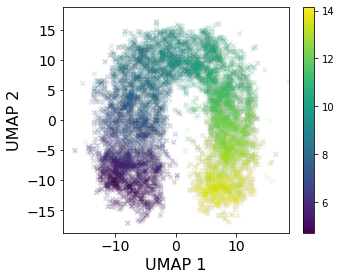

In [10]:
fig = viz.stacked(out, 'label', show=True, #save='/Users/zhuoranx/Documents/Coursework/STAT970/final/umap_stack.png',
                 xlabel="UMAP 1", ylabel="UMAP 2", dpi=300, marker="x", s=20, 
                  show_legend=True, solid_legend=True,alpha=0.015,width=5, height=4,
                     cmap='viridis')

In [13]:
###PCA
S_y = pd.DataFrame(S_y, columns=["label"])
out = boot.generate(S_X, Y=S_y, method="pca", B=20, random_seed=46, random_state=46, num_jobs=4)

100%|██████████| 20/20 [00:00<00:00, 289.57it/s]


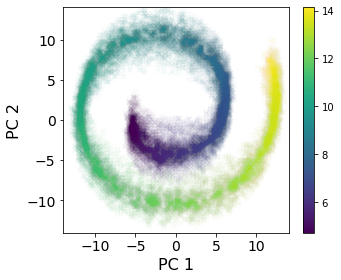

In [15]:
fig = viz.stacked(out, 'label', show=True, save='/Users/zhuoranx/Documents/Coursework/STAT970/final/umap_stack_PCA.png',
                 xlabel="PC 1", ylabel="PC 2", dpi=300, marker="x", s=20, 
                  show_legend=True, solid_legend=True,alpha=0.015,width=5, height=4,
                     cmap='viridis')

Setting up neighborhoods...
--- 48.59464192390442 seconds ---
Populating distances...
--- 15.302786111831665 seconds ---
Computing mean pairwise distance for normalization...
--- 1.9256603717803955 seconds ---
Computing variance scores...
--- 3.7113680839538574 seconds ---


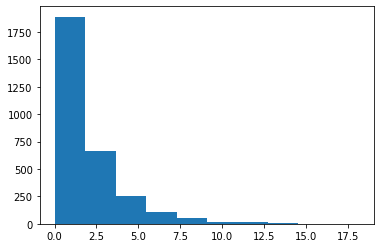

In [28]:
# compute variance score 
variance_scores = score.variance(out, method="local", k=30, X_orig=S_X)
plt.hist(variance_scores)
plt.show()

Computing stability score with alpha=20 ...
--- 0.0003018379211425781 seconds ---


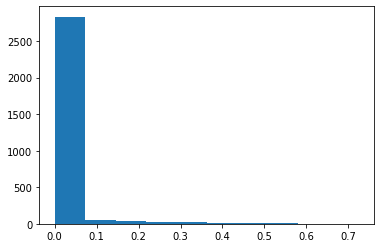

In [29]:
# compute stability score from variance score
stability_scores = score.stability_from_variance(variance_scores, alpha=20)
plt.hist(stability_scores)
plt.show()